# Data Visualization

**Initial steps:**

1. Import required libraries.

2. Load the data.

3. Plotting.

4. 

5. 

6. 

7. 

8. 

## 1. Import required libraries.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## 2. Load the data.

In [2]:
# Import data from csv to a Pandas DataFrame

df = pd.read_csv('Data/Cars_ReCleanData.csv')
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,Diesel,Gas
0,Subaru,2,hatchback,four,0.297546,9.0,69,4900,31,36,5118.0,Low,0,1
1,Mazda,2,hatchback,four,0.279141,9.0,68,5000,30,31,5195.0,Low,0,1
2,Toyota,2,hatchback,four,0.282209,9.0,62,4800,35,39,5348.0,Low,0,1
3,Mitsubishi,2,hatchback,four,0.282209,9.4,68,5500,37,41,5389.0,Low,0,1
4,Honda,2,hatchback,four,0.242331,10.1,60,5500,38,42,5399.0,Low,0,1


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method and/or use the `describe()` method.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               157 non-null    object 
 1   Doors              157 non-null    int64  
 2   Body style         157 non-null    object 
 3   Num of cylinders   157 non-null    object 
 4   Engine size        157 non-null    float64
 5   Compression ratio  157 non-null    float64
 6   Horsepower         157 non-null    int64  
 7   Peak rpm           157 non-null    int64  
 8   City mpg           157 non-null    int64  
 9   Highway mpg        157 non-null    int64  
 10  Price              157 non-null    float64
 11  Horsepower binned  157 non-null    object 
 12  Diesel             157 non-null    int64  
 13  Gas                157 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 17.3+ KB


In [4]:
df.describe()

,Doors,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Diesel,Gas
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0,157.0
mean,3.159236,0.355848,8.932611,97.063694,5185.668790,25.324841,31.076433,11018.477707,0.0,1.0
std,0.990400,0.076160,0.530368,28.131031,411.252034,5.245531,5.413115,4562.908291,0.0,0.0
min,2.000000,0.214724,7.500000,60.000000,4200.000000,16.000000,20.000000,5118.000000,0.0,1.0
25%,2.000000,0.297546,8.700000,70.000000,4800.000000,21.000000,27.000000,7463.000000,0.0,1.0
50%,4.000000,0.337423,9.000000,92.000000,5200.000000,25.000000,31.000000,9295.000000,0.0,1.0
75%,4.000000,0.398773,9.310000,114.000000,5500.000000,30.000000,34.000000,13950.000000,0.0,1.0
max,4.000000,0.555215,10.100000,175.000000,6000.000000,38.000000,47.000000,24565.000000,0.0,1.0


## 3. Plotting.

There are many plotting styles available other than the default `Line` plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `line` for a line plot (default)
* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

### Line

In [5]:
subaru = df[df.Make=='Subaru']
# subaru.head()

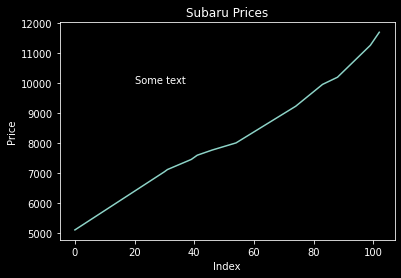

In [6]:
subaru.Price.plot(kind='line')
plt.title('Subaru Prices')
plt.ylabel('Price')
plt.xlabel('Index')
plt.text(20, 10000, 'Some text')
plt.show()

### Scatter

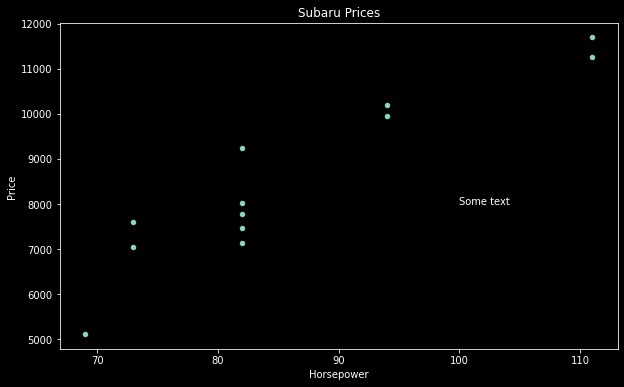

In [7]:
subaru.plot(kind='scatter', x='Horsepower', y='Price', figsize=(10, 6))
plt.title('Subaru Prices')
plt.ylabel('Price')
plt.xlabel('Horsepower')
plt.text(100, 8000, 'Some text')
plt.show()

Let's try to plot a linear line of best fit with **Numpy**'s `polyfit()` method, and use it to  predict the price for Subaru.

In [8]:
x = subaru.Horsepower
y = subaru.Price
fit = np.polyfit(x, y, deg=1) # First order polynomial fit
print(fit)

[  131.21806405 -2776.30802447]


The result is:

$$
Price = 131.2 \times Horsepower - 2776.3
$$

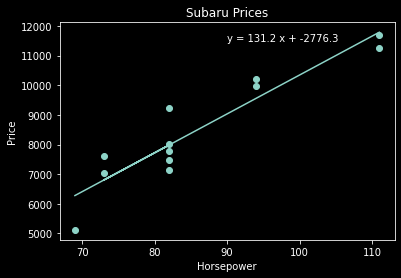

In [9]:
plt.scatter(x, y)
plt.title('Subaru Prices')
plt.ylabel('Price')
plt.xlabel('Horsepower')
# plot line of best fit
plt.plot(x, fit[0] * x + fit[1])
plt.annotate(f'y = {fit[0]:.1f} x + {fit[1]:.1f}', xy=(90, 11500))
plt.show()

In [10]:
df_bymake2 = df.groupby('Make', axis=0)[['Price']].count()
# df_bymake2.head()

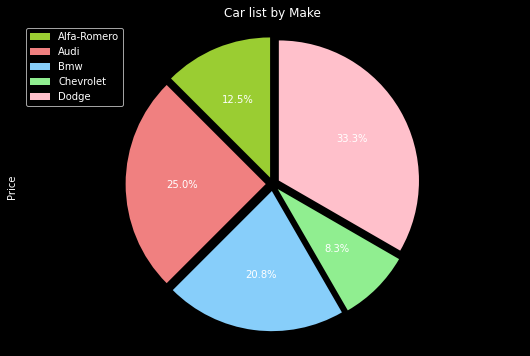

In [11]:
colors_list = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.05, 0.05, 0.05, 0.05, 0.05] # ratio for each continent with which to offset each wedge.

df_bymake2['Price'][:5].plot(kind='pie',
                            figsize=(9, 6),
                            autopct='%1.1f%%',   # used to label the wedges with their numeric value.
                            startangle=90,       # start angle 90°   
                            labels=None,         # turn off labels on pie chart
                            pctdistance=0.6,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )
plt.title('Car list by Make')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_bymake2.index[:5], loc='upper left') 
plt.show()

### Box Plots

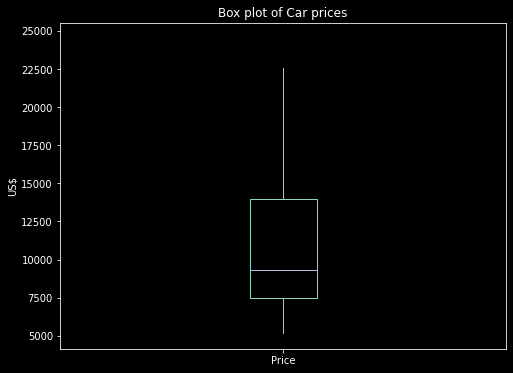

In [12]:
df[['Price']].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Car prices')
plt.ylabel('US$')
plt.show()

In [13]:
df[['Price']].describe()

,Price
count,157.000000
mean,11018.477707
std,4562.908291
min,5118.000000
25%,7463.000000
50%,9295.000000
75%,13950.000000
max,24565.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets.

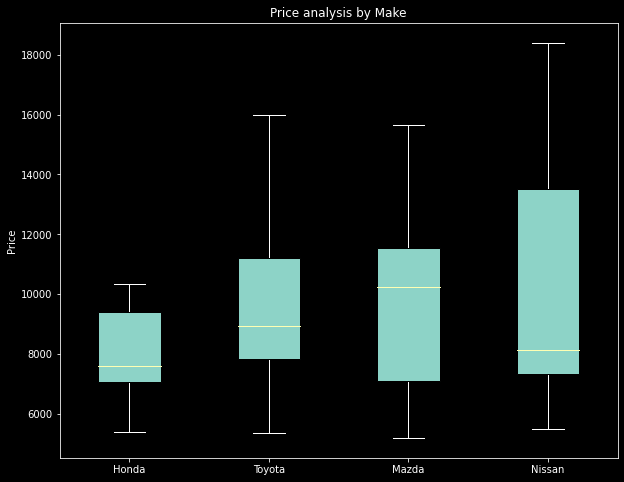

In [14]:
mask = (df.Make == 'Honda')
honda = df[mask]['Price']
mask = (df.Make == 'Toyota')
toyota = df[mask]['Price']
mask = (df.Make == 'Mazda')
mazda = df[mask]['Price']
mask = (df.Make == 'Nissan')
nissan = df[mask]['Price']

data = [honda, toyota, mazda, nissan]
labels = ['Honda', 'Toyota', 'Mazda', 'Nissan']
my_style = {'whiskerprops': dict(color='white'),
            'capprops': dict(color='white')}

plt.figure(figsize=(10,8))
plt.boxplot(data,
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels, # will be used to label x-ticks
            **my_style)
plt.title('Price analysis by Make')
plt.ylabel('Price')
# plt.grid(True)
plt.show()

### Bubble Plots

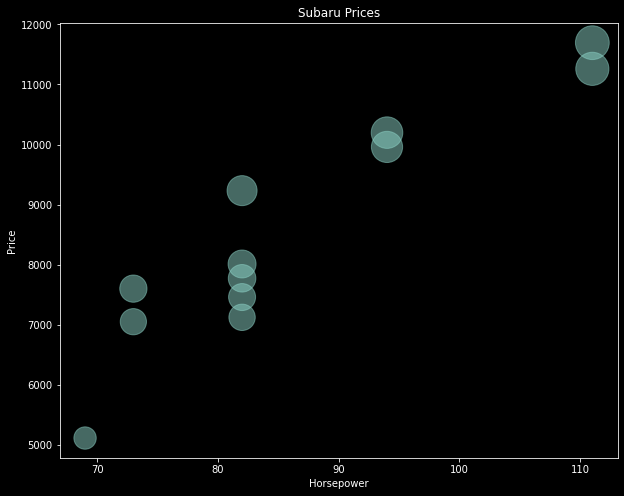

In [15]:
plt.figure(figsize=(10, 8))
# s represents the area of the bubble, in this case this dimentions represents the fraction price/min_price
plt.scatter(x, y, alpha=0.5, s = subaru.Price/subaru.Price.min()*500)
plt.title('Subaru Prices')
plt.ylabel('Price')
plt.xlabel('Horsepower')
plt.show()

### Area Plots

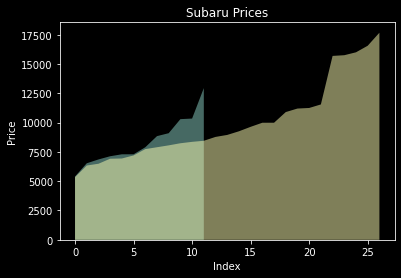

In [30]:
plt.stackplot(range(len(honda)), honda, alpha=0.5)
plt.stackplot(range(len(toyota)), toyota, alpha=0.5)
plt.title('Subaru Prices')
plt.ylabel('Price')
plt.xlabel('Index')
plt.show()

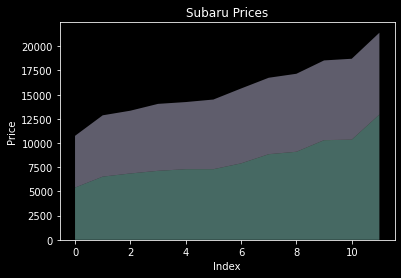

In [33]:
plt.stackplot(range(len(honda)), honda, range(len(honda)), toyota[0:len(honda)], alpha=0.5)
plt.title('Subaru Prices')
plt.ylabel('Price')
plt.xlabel('Index')
plt.show()

### Histograms

[3 4 7 4 3 1 0 0 3 2]
[ 5348.   6580.1  7812.2  9044.3 10276.4 11508.5 12740.6 13972.7 15204.8
 16436.9 17669. ]


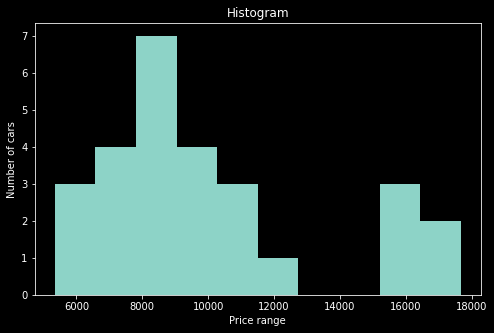

In [37]:
count, bin_edges = np.histogram(toyota)
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

toyota.plot(kind='hist', figsize=(8, 5))
plt.title('Histogram') # add a title to the histogram
plt.ylabel('Number of cars') # add y-label
plt.xlabel('Price range') # add x-label
plt.show()

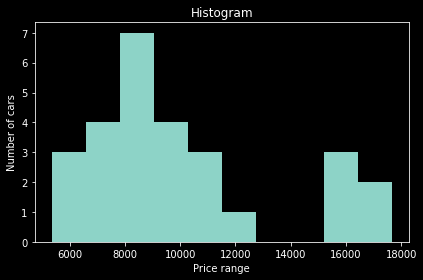

In [43]:
num_bins = 10
n, bins, patches = plt.hist(toyota, num_bins)
plt.xlabel('Price range')
plt.ylabel('Number of cars')
plt.title(r'Histogram')
plt.tight_layout()
plt.show()

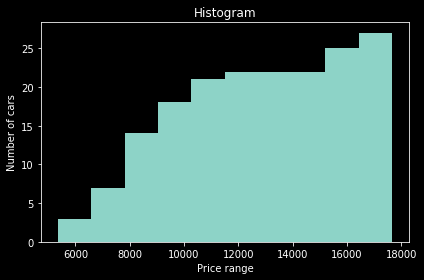

In [44]:
num_bins = 10
n, bins, patches = plt.hist(toyota, num_bins, cumulative=True)
plt.xlabel('Price range')
plt.ylabel('Number of cars')
plt.title(r'Histogram')
plt.tight_layout()
plt.show()

### Bar Chart

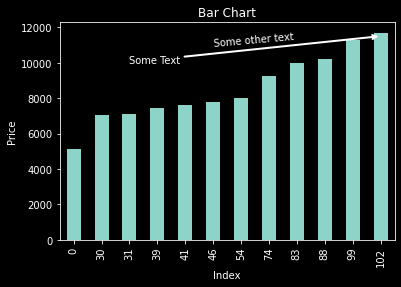

In [71]:
subaru.Price.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Bar Chart')
plt.annotate('Some Text',             # str
             xy=(11, 11500),          # place head of the arrow at point
             xytext=(2, 10000),       # place base of the arrow at point
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='white', lw=2)
            )
plt.annotate('Some other text', # text to display
             xy=(5, 10800),                    # start the text at at point (year 2008 , pop 30)
             rotation=5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.show()

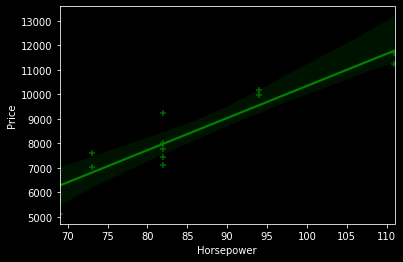

In [69]:
sns.regplot(x='Horsepower', y='Price', data=subaru, color='green', marker='+')
plt.show()